In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object
import warnings
warnings.filterwarnings('ignore')
%pylab inline


import os
print(os.listdir("../input"))



In [ ]:
data2019 = pd.read_csv("worlddata.csv")
test = pd.read_csv("testdata.csv")


In [ ]:
#columns of training dataset
data2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [ ]:
data2015.shape

(158, 12)

In [ ]:
#information about world dataset
data2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [ ]:
import sklearn

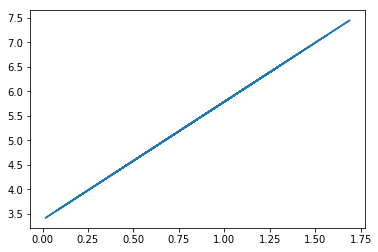

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
x1 = data2019['Health'].values.reshape(-1,1)

x2 = data2019['Freedom'].values.reshape(-1,1)
x3 =  data2019['Social'].values.reshape(-1,1)

y =  testdata['Happiness Score'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state=0)

lin_reg.fit(x_train,y_train)
y_pred = lin_reg.predict(x_test)
plt.plot(x_test,y_pred)



In [ ]:
b0 = lin_reg.intercept_
b1 = lin_reg.coef_
print('equation of the line is: ',b1,'x +',b0)

equation of the line is:  [[2.4060534]] x + [3.38107425]


In [ ]:
xtest = pd.DataFrame(x_test)
ypred = pd.DataFrame(y_pred)
prediction = pd.concat([xtest,ypred],axis=1)
prediction.columns = ['xtest','ypred']
prediction.sort_values(by='xtest', ascending=False, axis = 0, inplace = True)
prediction.head()




,xtest,ypred
40,1.69042,7.448315
32,1.56391,7.143925
27,1.42727,6.815162
47,1.38604,6.715961
0,1.33171,6.585240


In [ ]:
xtest = pd.DataFrame(x_test)
ytest = pd.DataFrame(y_test)
test = pd.concat([xtest,ytest],axis=1)
test.columns = ['xtest','ytest']
test.sort_values(by='xtest', ascending=False, axis = 0, inplace = True)
test.head()

,xtest,ytest
40,1.69042,6.611
32,1.56391,6.946
27,1.42727,6.901
47,1.38604,5.474
0,1.33171,7.364


In [ ]:
#Multiple linear regression
x1 = data2015[['Health (Life Expectancy)','Family','Freedom']].values
y1 = data2015['Happiness Score'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size = 0.33, random_state=0)
mlp = LinearRegression()
mlp.fit(x1_train,y1_train)
y1_predict = pd.DataFrame(mlp.predict(x1_test))
y1_test = pd.DataFrame(y1_test)



In [ ]:
#comparing of university students testdata and prediction from world data set

comp  = pd.concat([y1_predict,y1_test],axis=1)
comp.columns = ['y1_predict','y1_test']
comp.sort_values(by='y1_test', ascending=False, axis = 0, inplace = True)
comp.sample(10)

,y1_predict,y1_test
43,5.459298,5.124
16,4.506742,4.297
21,6.214276,6.455
10,6.257283,6.786
25,6.163405,6.298
28,4.852261,3.819
2,4.391026,4.633
36,3.942098,4.971
45,5.907276,5.754
26,5.310499,4.857
